In [1]:
from IPython.display import HTML

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# We analize the growth of 1000$ invested in S&P 500 (total return) between 1990 and 2017 included.
## The annualized compound total return was about 9,8%.
## In our analysis we used the log returns to exploit the additive property, but conclusion are the same.

### What would have been the growth if we had excluded the best days and the worst days from our trading strategy?

<b> We took the data from yahoo database <br></b>
<b> <u>We have substitute the missed worst days and the missed best days with a return equal to 0. </u> </b>

In [3]:
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_style("whitegrid")

In [4]:
df1 = pd.read_csv('^SP500TR.csv')
df1.set_index('Date', inplace = True)
df1.index = pd.to_datetime(df1.index)

In [5]:
df = df1.copy()

In [6]:
log_rets = (np.log(df['Adj Close']) - np.log(df['Adj Close'].shift(1)))[1:]

In [7]:
def growth_without_worstdays(df1):  
    wealths = []
    total_log_ret = np.sum(df1)
    final_wealth = np.exp(total_log_ret)*1000
    print('Growth of 1000$ from 1990 to 2017: {}$'.format((np.exp(total_log_ret)*1000).round(2)))
    print()
    df = df1.copy()
    wealths.append(final_wealth)
    missed_worst_days = [1,5,15,25]
    for n in missed_worst_days:        
        values_to_convert_in_zero = df.sort_values().values[:n]
        log_rets_minus_n_worstdays = df.where(df > values_to_convert_in_zero.max(),0.)
        total_log_ret = np.sum(log_rets_minus_n_worstdays)
        final_wealth = np.exp(total_log_ret)*1000
        wealths.append(final_wealth)
        print('Growth of 1000$ without {} worst days: {}$'.format(n, final_wealth.round(2)))
        print()
    fig, ax = plt.subplots(figsize=(10,8))
    xpos = [i+1 for i,_ in enumerate(missed_worst_days)]
    sns.barplot([0]+xpos, wealths, ax = ax)  
    for i,t in zip(ax.patches,wealths):
    # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+.2, i.get_height()+10, \
                str(int(t))+' $', fontsize=15,
                    color='yellow', backgroundcolor = 'black' )
    plt.xticks([0]+xpos, ['Total period'] + missed_worst_days, fontsize = 'large')
    plt.xlabel('Missed worst days', fontsize = 'xx-large')
    plt.ylabel('Growth of 1000$', fontsize = 'xx-large')
    plt.title('Performance of S&P 500 Index (TR), 1990-2017 ',fontsize = 'x-large',color = 'yellow',backgroundcolor = 'black')
    return None

## Let's start excluding the worst days of the S&P500 Index

Growth of 1000$ from 1990 to 2017: 13498.96$

Growth of 1000$ without 1 worst days: 14838.25$

Growth of 1000$ without 5 worst days: 20758.77$

Growth of 1000$ without 15 worst days: 38363.65$

Growth of 1000$ without 25 worst days: 62102.83$



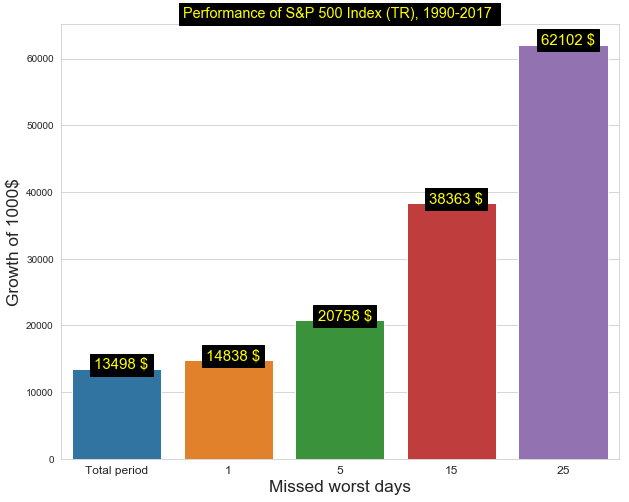

In [8]:
growth_without_worstdays(log_rets)

In [9]:
def growth_without_bestdays(df1):  
    wealths = []
    total_log_ret = np.sum(df1)
    final_wealth = np.exp(total_log_ret)*1000
    print('Growth of 1000$ from 1990 to 2017: {}$'.format((np.exp(total_log_ret)*1000).round(2)))
    print()
    df = df1.copy()
    wealths.append(final_wealth)
    missed_best_days = [1,5,15,25]
    for n in missed_best_days:        
        values_to_convert_in_zero = df.sort_values(ascending = False).values[:n]
        log_rets_plus_n_bestdays = df.where(df < values_to_convert_in_zero.min(),0.)
        total_log_ret = np.sum(log_rets_plus_n_bestdays)
        final_wealth = np.exp(total_log_ret)*1000
        wealths.append(final_wealth)
        print('Growth of 1000$ without {} best days: {}$'.format(n, final_wealth.round(2)))
        print()
    fig, ax = plt.subplots(figsize=(10,8))
    xpos = [i+1 for i,_ in enumerate(missed_best_days)]
    sns.barplot([0]+xpos, wealths, ax = ax)  
    for i,t in zip(ax.patches,wealths):
    # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+.2, i.get_height()+10, \
                str(int(t))+' $', fontsize=15,
                    color='yellow', backgroundcolor = 'black' )   
    plt.xticks([0]+xpos, ['Total period'] + missed_best_days, fontsize = 'large')
    plt.xlabel('Missed best days', fontsize = 'xx-large')
    plt.ylabel('Growth of 1000$', fontsize = 'xx-large')
    plt.title('Performance of S&P 500 Index (TR), 1990-2017 ',fontsize = 'x-large', color = 'yellow',backgroundcolor = 'black')
    return None

## Now we exclude the best days of the S&P 500 Index

Growth of 1000$ from 1990 to 2017: 13498.96$

Growth of 1000$ without 1 best days: 12097.89$

Growth of 1000$ without 5 best days: 8955.13$

Growth of 1000$ without 15 best days: 5271.07$

Growth of 1000$ without 25 best days: 3394.13$



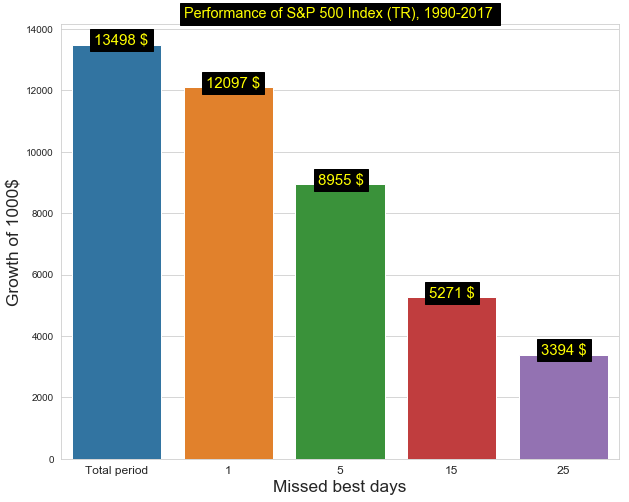

In [10]:
growth_without_bestdays(log_rets)

### <font color = 'black'> <u>So it's more important to avoid the worst days than to enter in the best days. </u> </font>